In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings(action="ignore")
import os

In [55]:
df = pd.read_csv('Credit_card_dataset.csv')

In [56]:
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [58]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [59]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

In [60]:
df = df.drop('CUST_ID', axis = 1)

In [61]:
df

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,95.40,201.802084,1000.0,0.000000
1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,1.000000,773.17,622.066742,7500.0,0.000000
3,0.636364,1499.00,0.000000,7500.0,205.788017
4,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...
8945,1.000000,291.12,325.594462,1000.0,0.000000
8946,1.000000,300.00,275.861322,1000.0,0.000000
8947,0.833333,144.40,81.270775,1000.0,0.000000
8948,0.833333,0.00,52.549959,500.0,36.558778


In [62]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [ ]:
# Select two features for clustering
data_hierarchical = df[['PURCHASES', 'CREDIT_LIMIT']]

# Generate linkage matrix
linked = linkage(data_hierarchical, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


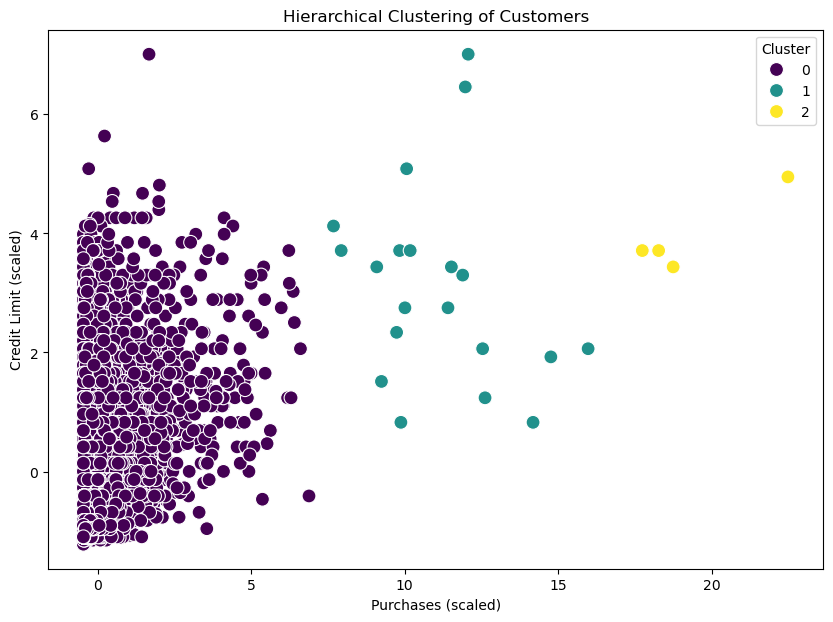

In [65]:

X = df[['PURCHASES', 'CREDIT_LIMIT']].copy()

cluster = AgglomerativeClustering(n_clusters=3, linkage='complete')
df['Cluster'] = cluster.fit_predict(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel('Purchases (scaled)')
plt.ylabel('Credit Limit (scaled)')
plt.title('Hierarchical Clustering of Customers')
plt.legend(title='Cluster')
plt.show()


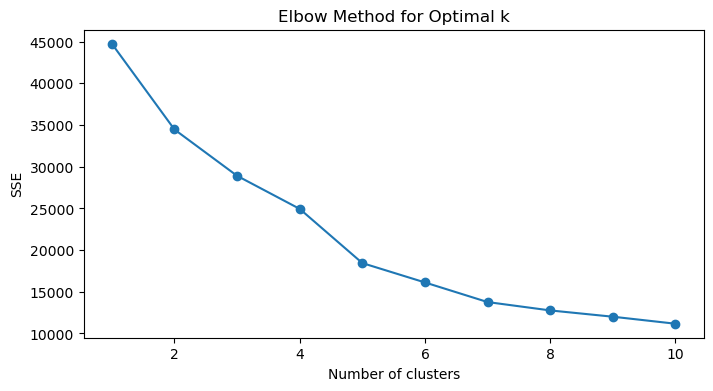

In [66]:
# Using the scaled data for K-means
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


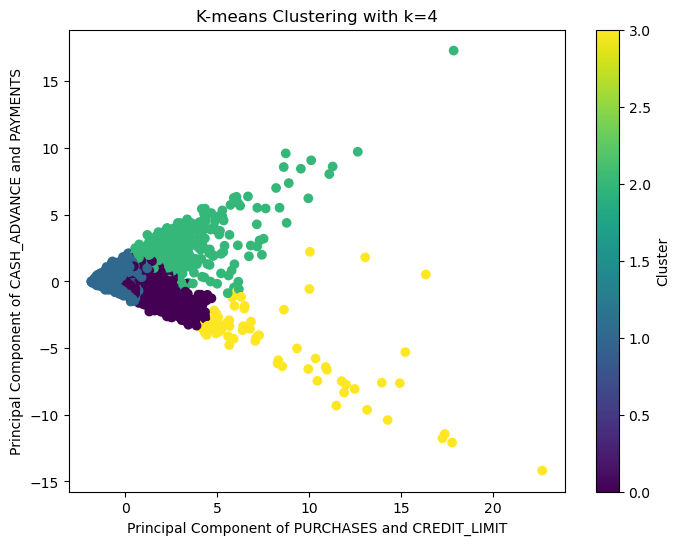

In [73]:
# Fit K-means with optimal k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize K-means Clusters with PCA
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['KMeans_Cluster'], cmap='viridis', marker='o')
plt.title(f'K-means Clustering with k={optimal_k}')
plt.xlabel('Principal Component of PURCHASES and CREDIT_LIMIT')
plt.ylabel('Principal Component of CASH_ADVANCE and PAYMENTS')
plt.colorbar(label='Cluster')
plt.show()


### Hierarchical Clustering:
Based on the hierarchical clustering revealed groups that may be based on customer spending behavior (PURCHASES) and credit availability (CREDIT_LIMIT). These clusters indicate the following: 

##### Purple Cluster:
This cluster contains the majority of the customers.
Customers in this cluster have a low to moderate CREDIT_LIMIT and make low purchases.
These customers may represent a segment with conservative spending behavior or limited credit usage. They likely use the card infrequently or make small transactions.
##### Green Cluster:
This cluster is more spread out and includes customers with varying credit limits but relatively higher purchase amounts.
These customers may represent a segment that utilizes their credit more actively and possibly makes larger or more frequent purchases.
The spread in CREDIT_LIMIT suggests some variation in financial profiles within this segment.
##### Yellow Cluster:
This small cluster includes customers with high PURCHASES and moderate to high CREDIT_LIMIT.
These customers are likely high-value or high-spending individuals who actively use their credit cards, potentially for substantial purchases or regular spending.

#### K-means Clustering: 
K-means identified four distinct clusters based on overall customer data, taking into account additional features like BALANCE_FREQUENCY, CASH_ADVANCE, and PAYMENTS. Each cluster represents a different customer segment with specific spending and payment behavior.

##### Dark purple Cluster: 
Positioned close to the origin, this cluster may represent customers with lower credit usage, smaller purchase amounts, and lower cash advance or payment levels. These customers might be conservative users who spend within their credit limits and avoid cash advances.
##### Green Cluster: 
Positioned higher along the y-axis, these customers could have moderate credit limits and a balanced spending pattern, with occasional cash advances or repayments.
##### Yellow Cluster: 
Spread out further along both axes, this group might consist of high-value customers with higher purchasing power and larger credit limits, frequently utilizing cash advances and making substantial payments.
##### Blue Cluster: 
Clustered around a midpoint, these customers appear to have moderate levels of credit usage and purchasing, possibly a balanced group with neither low nor excessive financial activity.